# Honor 4 时空数据可视化


## 时序数据可视化

### 线性

时间具有序列性。可以将时间作为横坐标，反映的属性作为纵坐标。

#### 层叠

(stacking graph) 不同种类可以叠加，通过宽度反映。


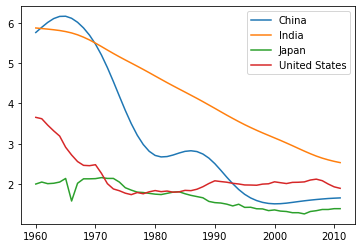

In [24]:
from statsmodels.datasets import fertility
import numpy as np
from matplotlib import pyplot as plt

data = fertility.load_pandas().data
countries = [37,88,97,205]
plt.xticks([(_) for _ in np.arange(0, 52, 10)], [str(_) for _ in np.arange(1960, 2020, 10)])
[plt.plot(data.iloc[c].loc['1960':'2011']) for c in countries]
plt.legend(data.iloc[countries]['Country Name'])
plt.show()

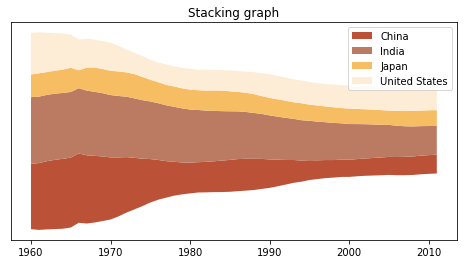

In [205]:
from statsmodels.datasets import fertility
import numpy as np
from matplotlib import pyplot as plt

data = fertility.load_pandas().data
countries = [37,88,97,205]

plt.figure(figsize = (8, 4))
plt.stackplot(np.arange(1960, 2012), 
    np.vstack([np.array(data.iloc[c].loc['1960':'2011'], dtype = 'float32') for c in countries]), 
    baseline = 'sym', colors = ["#BB5137", "#BB7B62", "#F7BD62", "#FDEDD6"])
plt.yticks([])
plt.legend(data.iloc[countries]['Country Name'])
plt.title('Stacking graph')
plt.show()


#### 流图

[(stream graph)](https://www.data-to-viz.com/graph/streamgraph.html#:~:text=A%20Stream%20graph%20is%20a%20type%20of%20stacked,for%20several%20groups%2C%20all%20with%20a%20distinct%20color.) 还可以用高斯平滑核或者插值等方式让曲线光滑一点。

代码: https://www.python-graph-gallery.com/streamchart/

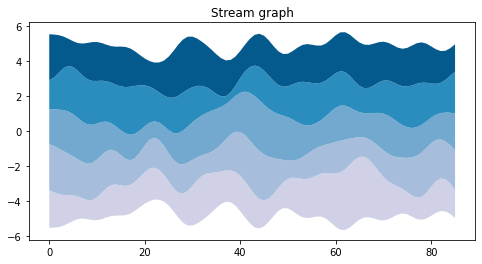

In [124]:
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np
np.random.seed(0)
# data = [5 + np.cumsum(.2 + ArmaProcess(arparams, maparams).generate_sample(nsample = 100)) for _ in range(5)]
data = [(np.random.randint(0, 5, size=100)) for _ in range(5)]
gaussian = (np.exp(-np.linspace(-2, 2, 15)**2))
gaussian /= gaussian.sum()
data = [np.convolve(_, gaussian, 'valid') for _ in data] # gaussian kernel smoothing

plt.figure(figsize = (8, 4))
plt.stackplot(np.arange(data[0].size), data, baseline = 'sym', 
    colors = ["#D0D1E6", "#A6BDDB", "#74A9CF", "#2B8CBE", "#045A8D"])
plt.title('Stream graph')
plt.show()

### 环形

时间具有周期性，可以用环形体现。到圆心的距离可以反映数据值大小。

#### 南丁格尔玫瑰图

(Nightingale rose chart) 用扇形半径或面积体现数据值大小。缺点：有时候看起来很不匀称。

南丁格尔玫瑰图也可以可视化类别数据（非时序数据）。

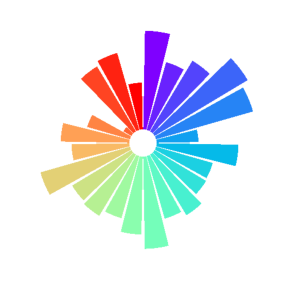

In [204]:
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np

# advice: do not use python ^_^

def nightingale(data, colors = None, baseline = 0, figsize = None,
                    anglepad = np.pi/180, r = .1, R = .9, N = 300):
    """
    colors: float32 array, shape = (len(data), channel)
    baseline: the value of inner circle
    anglepad: angle gap between two sectors
    r: inner radius
    R: outer radius
    N: canva size
    """
    m = len(data)
    if colors is None: colors = cm.get_cmap('rainbow', m)(np.arange(m))
    data = np.array(data, dtype = 'float32')
    data = (data - baseline) / (data.max() - baseline)
    X = np.full((N, N, len(colors[0])), 1.)
    coors = np.meshgrid(np.linspace(-1,1,N), np.linspace(1,-1,N))
    angle = (np.pi / 2 - np.angle(coors[0] + coors[1]*1j)) % (np.pi * 2)
    polar = np.sqrt(coors[0]**2 + coors[1]**2)
    for i, v in enumerate(data):
        for channel in range(len(colors[0])):
            X[:,:,channel] = np.where(
                (i/m*np.pi*2 + anglepad < angle) & (angle < (i+1)/m*np.pi*2 - anglepad) 
              & (r < polar) & (polar < r + v * (R - r)),
                colors[i][channel], X[:,:,channel]
            )

    if figsize is not None: plt.figure(figsize = figsize)
    plt.imshow(X)
    plt.axis('off')
    plt.show()

np.random.seed(0)
data = np.random.randn(24) + 3
nightingale(data, figsize = (5, 5), N = 500)

### 网格

#### 日历可视化

如 [GitHub](https://github.com/ForeverHaibara) 热力图.

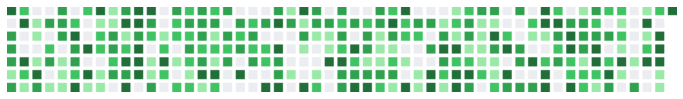

In [164]:
from matplotlib import pyplot as plt
import numpy as np

np.random.seed(0)
data = np.random.randint(0, 5, size = (365))
colors = [(235,237,240), (155,233,168), (64,196,99), (48,161,78), (33,110,57)]
r, g = 5, 2 # `r` is the length of side of a square, `g` is the gap between two squares
calendar = np.full((r*7+g*6, r*53+g*52, 3), 255)
for i in range(365):
    x = i % 7 * (r + g)
    y = i // 7 * (r + g)
    calendar[x:x+r, y:y+r] = colors[data[i]]
plt.figure(figsize = (12, 4))
plt.imshow(calendar)
plt.axis('off')
plt.show()

### 螺旋

可以在环形上错开一点变成螺旋形。既能保留周期性，又能反映总趋势。

### 其他


* 不止是环或螺旋，任何一条曲线都可以表示时间。
 
* 比较两个时序数据的相似度, 可以用 Dynamic Time Warping (DTW), 类似于字符串匹配 / 最长子串......

* 由于会增加新的时序数据, 类似于均值等数据特征会动态更新.

## 时空数据可视化

### 地图

地图投影方式有:
1. 等角度投影 (conformal projection), 又称墨卡托投影.
2. 等面积投影
3. 等距离投影

#### 层次

地图常常需要划分不同层次 / 比例尺 (scale). 便于观察以及存储.


### 时空数据

时空数据主要有三类:
1. 空间-时序数据 (某些地点在不同时间的特征, 例如空气监测站)
2. 时空事件数据 (某事件发生的时间与空间, 例如地震)
3. 轨迹数据 (人物运动的时空轨迹)

In [2]:
# from statsmodels.datasets import statecrime
# statecrime.load_pandas().data

### 切片

可以固定一个时间看空间, 或者固定一个空间位置看时间. 也可两者结合, 例如 linked-view, small multiples, 动画等方式.

空间立方体：地图作为平面直角坐标系，时间作为 z 轴，形成立体图可视化时空事件数据等。

#### 聚类

固定时间对空间聚类 或 固定空间对时间聚类.